# Dynamics to Control

We are going to control the motion of a rectangular "paddle".

The control inputs are forces $\bf F_{app}$ and torque $\bf \tau_{app}$ that are *applied to the center of mass*.


The pose of the paddle can be described as $(x,y,\theta_z)$. Where $x,y$ describe the center of mass coordinate.

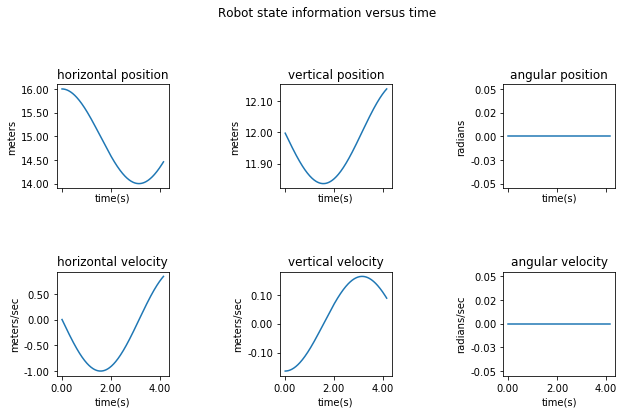

In [1]:
import tutorial; reload(tutorial); from tutorial import *


initial_pose = (16, 12,0.0)
desired_pose = (15, 12, 0.0)
m = bodies['robot'].mass
I = bodies['robot'].inertia
g = 9.81


K_px = m*1
K_py = m*1
K_pth = I*1


def closedLoopController (time, robot_state):
    
    # the output signal
    x,y,th, xdot, ydot, thdot = robot_state
    
    # the reference signal
    rx, ry, rth = desired_pose 
    
    # the error signal
    e_x = rx - x
    e_y = ry - y + g
    e_th = rth - th
    
    # the controller output
    u_x = K_px*e_x
    u_y = K_py*e_y
    u_th = K_pth*e_th
    
    return u_x, u_y, u_th 

result = run_pd_control(initial_pose, closedLoopController)
plot(result, "Robot")